In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"D:\Time_Series\Time_Series_Analysis\data\AirPassengers.csv")

df.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
df = df.set_index('Month')
df.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


# Visualize the time series

### Check for trend, seasonality or random patterns

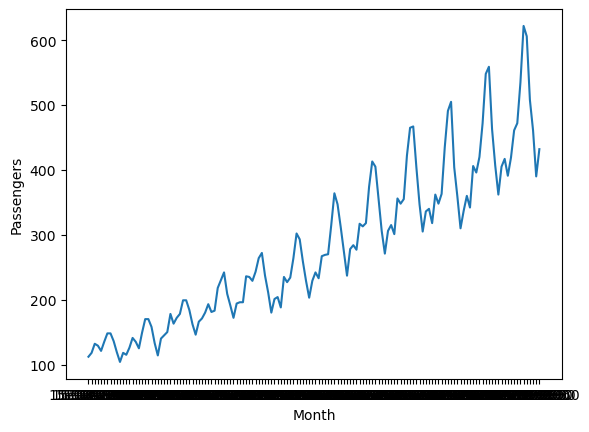

In [9]:
sns.lineplot(x=df.index, y = df['Passengers'])
plt.show()

# Check for statinority

## Method - 1 Rolling Statistics

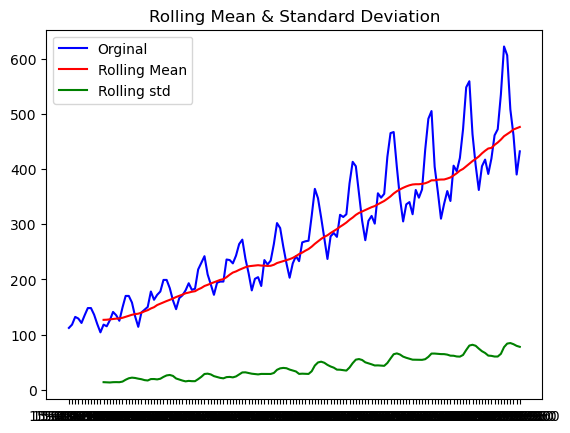

In [15]:
rolmen = df['Passengers'].rolling(window=12).mean()
rolstd = df['Passengers'].rolling(window=12).std()

#plot
orig = plt.plot(df['Passengers'], color= 'blue', label='Orginal')
mean = plt.plot(rolmen, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'green', label = 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(ticks=df.index)
plt.legend ()
plt.show()

### Method 2 Augmented Dicky Fuller Test

#### For ADF Test
H0 : Data is not-stationary
H1 : Data is stationary

based on pvalue, we accept or reject H0 (if p-value < 5% reject null hypothesis>)

In [12]:
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(df['Passengers'])
adfuller_result

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
print('p-value: ', adfuller_result[1])

p-value:  0.9918802434376411


In [14]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Passengers'] is your time series data
adfuller_result = adfuller(df['Passengers'])

print('ADF Test Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])
print('Number of Lags Used: ', adfuller_result[2])
print('Number of Observations Used: ', adfuller_result[3])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decision based on p-value
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Test Statistic:  0.8153688792060543
p-value:  0.9918802434376411
Number of Lags Used:  13
Number of Observations Used:  130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is not stationary.


## Covert data to stationary

In [16]:
#apply differencing

diff = df['Passengers'] - df['Passengers'].shift(1)

diff

Month
15-01-1949     NaN
15-02-1949     6.0
15-03-1949    14.0
15-04-1949    -3.0
15-05-1949    -8.0
              ... 
15-08-1960   -16.0
15-09-1960   -98.0
15-10-1960   -47.0
15-11-1960   -71.0
15-12-1960    42.0
Name: Passengers, Length: 144, dtype: float64

In [18]:
diff.dropna(inplace=True)

In [20]:
diff.head()

Month
15-02-1949     6.0
15-03-1949    14.0
15-04-1949    -3.0
15-05-1949    -8.0
15-06-1949    14.0
Name: Passengers, dtype: float64

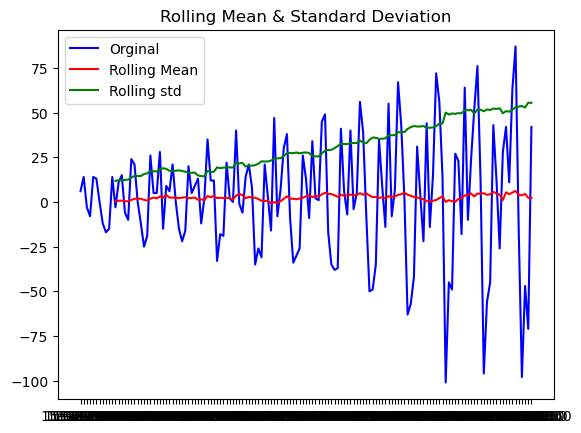

In [31]:
rolmen = diff.rolling(window=12).mean()
rolstd = diff.rolling(window=12).std()

#plot
orig = plt.plot(diff, color= 'blue', label='Orginal')
mean = plt.plot(rolmen, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'green', label = 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(ticks=diff.index)
plt.legend ()
plt.show()

In [26]:
adfuller_result = adfuller(diff)

print('ADF Test Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])
print('Number of Lags Used: ', adfuller_result[2])
print('Number of Observations Used: ', adfuller_result[3])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decision based on p-value
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Test Statistic:  -2.8292668241700034
p-value:  0.054213290283824954
Number of Lags Used:  12
Number of Observations Used:  130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is not stationary.


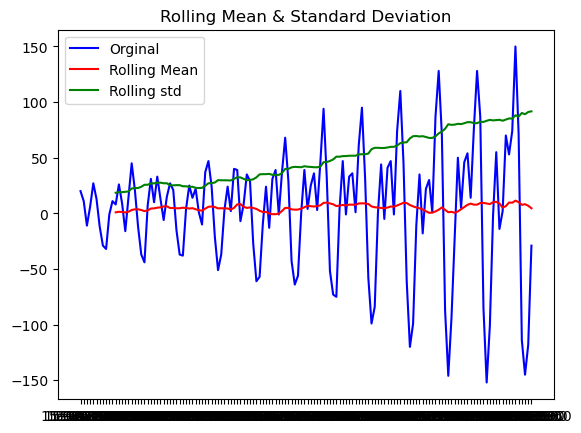

ADF Test Statistic:  -2.9616951355554337
p-value:  0.03862975767698741
Number of Lags Used:  11
Number of Observations Used:  130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is stationary.


In [35]:
#apply differencing step 2 

diff1 = df['Passengers'] - df['Passengers'].shift(2)

diff1.dropna(inplace=True)
rolmen = diff1.rolling(window=12).mean()
rolstd = diff1.rolling(window=12).std()

#plot
orig = plt.plot(diff1, color= 'blue', label='Orginal')
mean = plt.plot(rolmen, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'green', label = 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(ticks=diff1.index)
plt.legend ()
plt.show()


adfuller_result = adfuller(diff1)

print('ADF Test Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])
print('Number of Lags Used: ', adfuller_result[2])
print('Number of Observations Used: ', adfuller_result[3])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decision based on p-value
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

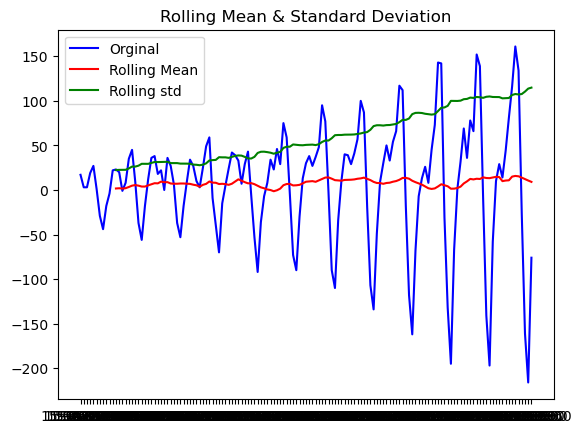

ADF Test Statistic:  -2.8865058565449706
p-value:  0.04693983572510758
Number of Lags Used:  10
Number of Observations Used:  130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is stationary.


In [34]:
#apply differencing step 3 

diff2 = df['Passengers'] - df['Passengers'].shift(3)

diff2.dropna(inplace=True)
rolmen = diff2.rolling(window=12).mean()
rolstd = diff2.rolling(window=12).std()

#plot
orig = plt.plot(diff2, color= 'blue', label='Orginal')
mean = plt.plot(rolmen, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'green', label = 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(ticks=diff2.index)
plt.legend ()
plt.show()


adfuller_result = adfuller(diff2)

print('ADF Test Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])
print('Number of Lags Used: ', adfuller_result[2])
print('Number of Observations Used: ', adfuller_result[3])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decision based on p-value
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

#### From above for step 2 have p-value - 0.038 less than 5%

In [36]:
diff1.head()

Month
15-03-1949    20.0
15-04-1949    11.0
15-05-1949   -11.0
15-06-1949     6.0
15-07-1949    27.0
Name: Passengers, dtype: float64

In [37]:
y_train = diff1[:114]
y_test = diff1[114:]

## Build ARIMA Model
### ARIMA Model is build by using p,d,q values

1. p is AR value(determined from PACF plot)
2. d is intergration
3. q is moving average (MV) determined by from ACF plot

Plot ACF/PACF and find p & q parameters
• Auto Correlation Function (ACF) 
- A function which gives us values of auto-correlation of any series with its lagged values.
  
• Partial Auto Correlation Function (PACF) 
- An indirect function to find Auto correlation after removing the relationship explained by previous lags


Time series lag example

• Original time series = (21,22,21,20,19}

• Lagged time series by 1 lag = {22,21,20,19}

• Lag 1 correlation will be correlation between {21,22,21,20} and {22,21,20,19}

## AutoRegressive (AR) Model:

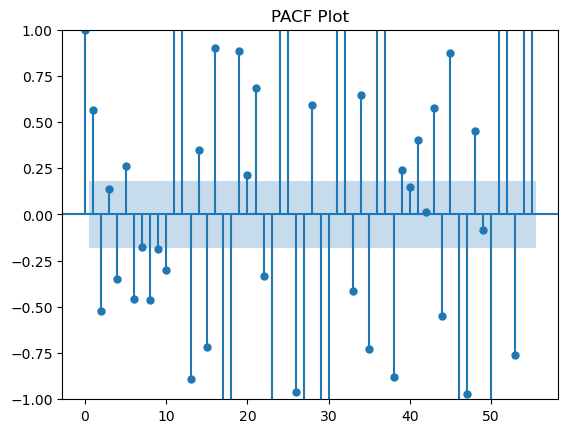

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(y_train, lags=55)
plt.title('PACF Plot')

plt.show()

In [54]:
best_aic = np.inf
best_lag = None
for lag in range(1,57):  
    model = AutoReg(y_train, lags=lag)
    result = model.fit()
    if result.aic < best_aic:
        best_aic = result.aic
        best_lag = lag
print(f"Best lag value is: {best_lag}")

Best lag value is: 56


Complexity: An AR(56) model is relatively complex, meaning it uses the previous 56 data points to predict the current one. This can lead to overfitting, especially if the size of your dataset isn't substantially larger than the number of lags. Overfitting means that while the model might fit the training data very well, it might not perform as well on new, unseen data.

In [55]:
from statsmodels.tsa.ar_model import AutoReg

model_AR = AutoReg(y_train, lags=56)

model_fit_AR = model_AR.fit()

In [56]:
start = len(y_train)
end = start + len(y_test) - 1
predictions = model_fit_AR.predict(start=start, end=end)

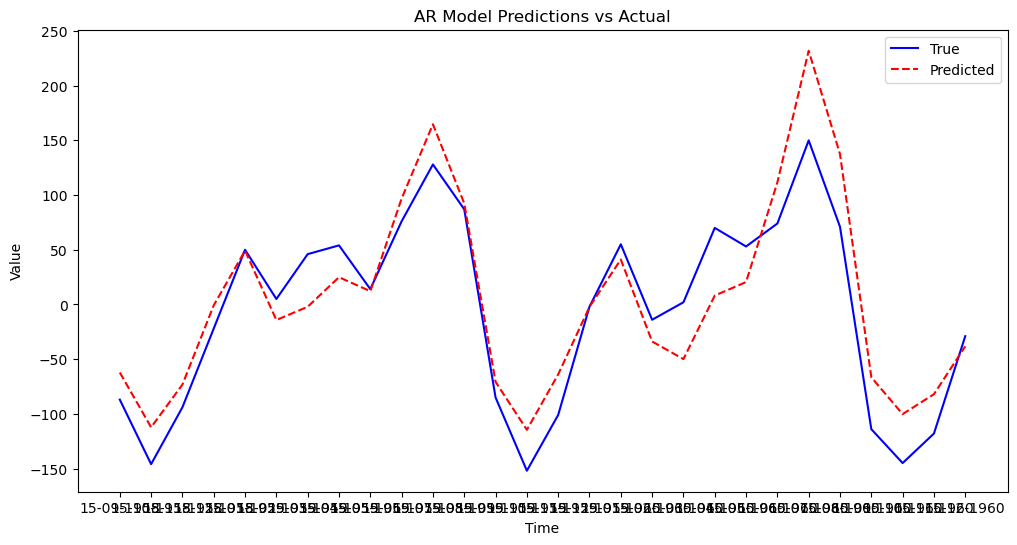

In [58]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the true values (y_test)
plt.plot(y_test.index, y_test.values, label='True', color='blue')

# Plot the predicted values (predictions)
plt.plot(y_test.index, predictions, color='red', linestyle='--', label='Predicted')

# Set the title and labels
plt.title('AR Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()

## Moving Average (MV)

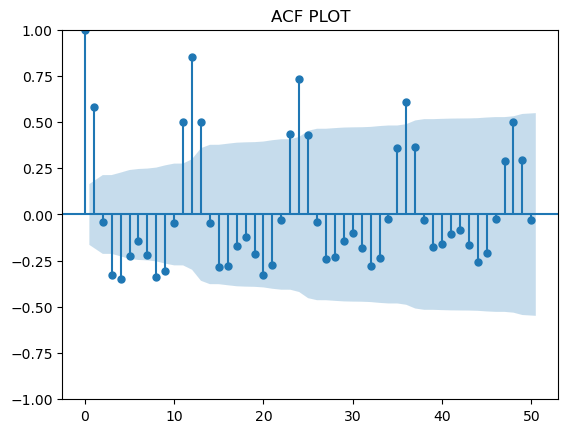

In [59]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff1, lags=50)
plt.title('ACF PLOT')
plt.show()

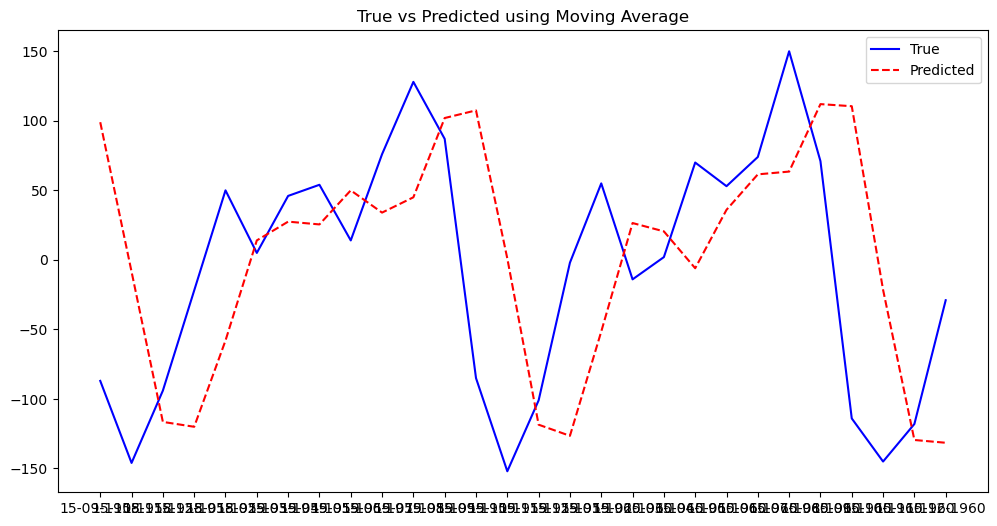

In [62]:
# Define window size for moving average
window_size = 2

# Calculate moving average on the training data
moving_avg_train = y_train.rolling(window=window_size).mean()

# Create a list combining the train and test data
combined = y_train.append(y_test)

# Initialize predictions list
predictions = []

# Walk-forward prediction
for t in range(len(y_train), len(combined)):
    # Calculate moving average up to time t (excluding the current value)
    moving_avg = combined.iloc[t-window_size:t].mean()
    predictions.append(moving_avg)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='True', color='blue')
plt.plot(y_test.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('True vs Predicted using Moving Average')
plt.legend()
plt.show()

## ARMA

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARMA model (order=(p, d, q) where d=0 for ARMA)
p = 56  # AR order
q = 1   # MA order
model_ARMA = ARIMA(y_train, order=(p, 0, q))
model_fit_ARMA = model_ARMA.fit()

In [66]:
train_predictions_ARMA = model_fit_ARMA.predict(start=0, end=len(y_train)-1)


In [64]:
# Predict on the test set
predictions_ARMA = model_fit_ARMA.forecast(steps=len(y_test))


In [67]:
from sklearn.metrics import r2_score

# Calculate R^2 for training data
r2_train = r2_score(y_train, train_predictions_ARMA)

# Calculate R^2 for testing data
r2_test = r2_score(y_test, predictions_ARMA)

print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")


Train R^2: 0.9598806320369685
Test R^2: 0.9113715165575533


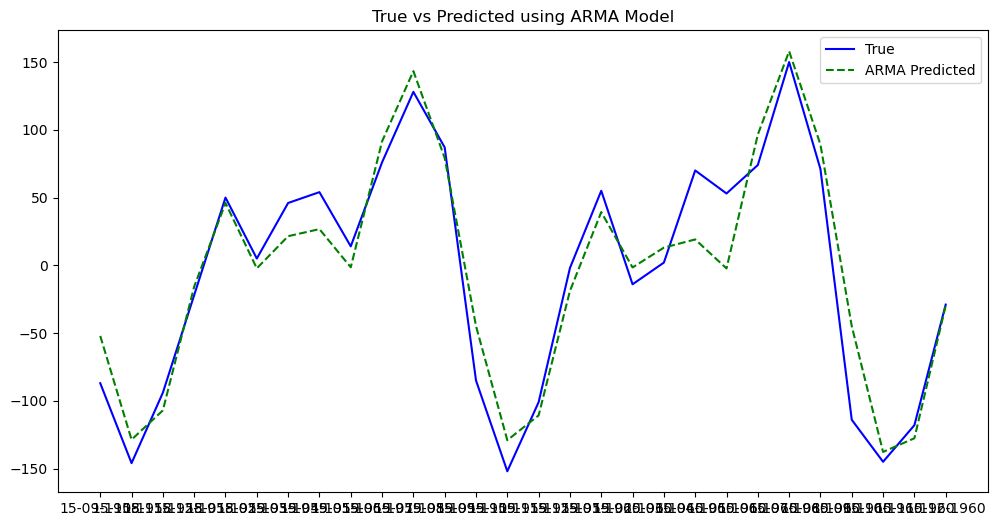

In [65]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='True', color='blue')
plt.plot(y_test.index, predictions_ARMA, label='ARMA Predicted', color='green', linestyle='--')
plt.title('True vs Predicted using ARMA Model')
plt.legend()
plt.show()

## ARIMA

Test R^2: 0.9147418786150581


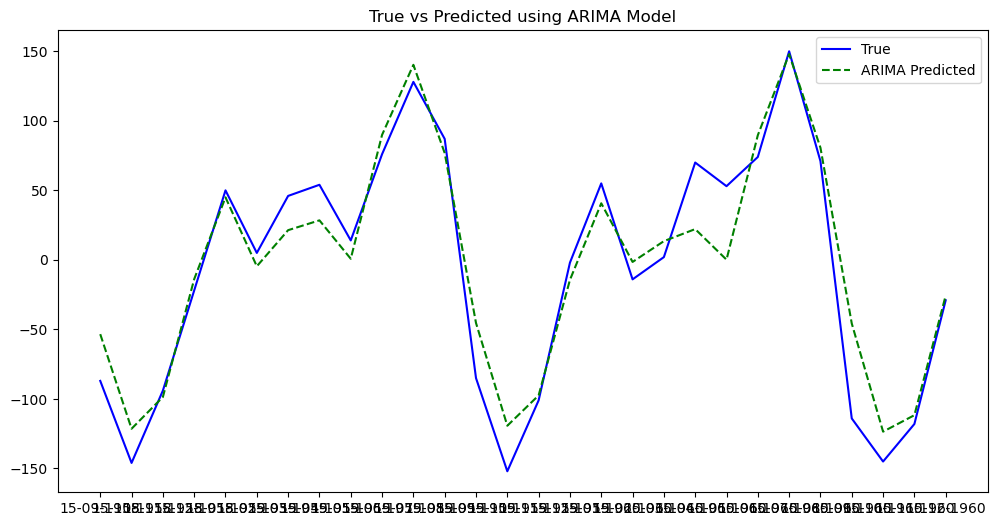

In [77]:

# Define the ARIMA model
# ARIMA order is (p, d, q)
# p is the number of lag observations included in the model (lag order)
# d is the number of times that the raw observations are differenced (degree of differencing)
# q is the size of the moving average window (order of moving average)

p = 56 # AR order
d = 1   # Degree of differencing
q = 2   # MA order

model_ARIMA = ARIMA(y_train, order=(p, d, q))
model_fit_ARIMA = model_ARIMA.fit()

# Predict on the training data
train_predictions_ARIMA = model_fit_ARIMA.predict(start=1, end=len(y_train), typ='levels')

# Predict on the test set
predictions_ARIMA = model_fit_ARIMA.forecast(steps=len(y_test))



# Calculate R^2 for testing data
r2_test = r2_score(y_test, predictions_ARIMA)


print(f"Test R^2: {r2_test}")

# Plot actual vs predicted values for testing data
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='True', color='blue')
plt.plot(y_test.index, predictions_ARIMA, label='ARIMA Predicted', color='green', linestyle='--')
plt.title('True vs Predicted using ARIMA Model')
plt.legend()
plt.show()
